# Part A



In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS

import numpy as np
import pandas as pd


In [2]:
#TO READ THE FILE FROM THE DATA SET
d_file = pd.read_csv(r'CE802_P2_Data.csv')
d_file.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


In [3]:
# TO CHECK THE MISSING VALUES
d_file.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [4]:
data = d_file.dropna()
d_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   int64  
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [5]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier    #Import Decision Tree Classifier
from sklearn import metrics                        ##Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt

In [6]:
minvalue = d_file['F21'].min()
d_file.fillna(value =minvalue,inplace = True)


In [7]:
d_file.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
Class    0
dtype: int64

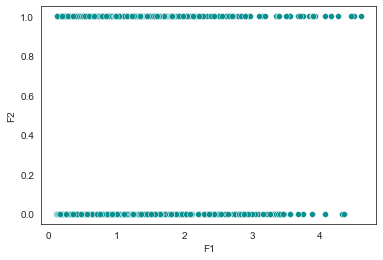

In [8]:
blue_green = ['#088F8F','#7393B3']
palette = sns.color_palette(blue_green)
sns.set_palette(palette)
sns.set_style("white")
sns.scatterplot(x='F1',y='F2',data=d_file);

In [9]:
## Import train_test_split function
from sklearn.model_selection import train_test_split 

In [10]:
i_features = d_file.drop(['Class'],axis=1)
o_features =d_file['Class']

In [11]:
i_features

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.12700,-17.1100,-63.340,3.61690,...,-2.3600,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.62560,-4.5800,-10.314,3.64880,...,-5.9680,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.36280,-14.7118,-6.806,3.62830,...,-3.3914,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,-54.96
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.93800,-7.5360,-4.670,3.01503,...,-2.6796,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,-54.96
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.28000,-14.5805,-45.920,3.60030,...,-5.0060,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.6828,1,-5766.04,-11.8536,-4.866600,1,7.93800,-11.1720,-8.014,3.27040,...,-2.9676,7.489000,-11922.06,23569.44,-1.4,103930.52,2.8358,1551.190,-5559.68,-54.96
996,1.2240,1,-4424.64,-16.6770,-8.313000,1,4.91960,-15.1500,-12.676,3.81610,...,-4.8220,7.069000,-11328.69,24196.14,-0.4,103922.40,4.0364,1519.940,-4089.48,-54.96
997,0.9912,1,-5566.64,-10.9698,-8.364000,0,3.99842,-15.4260,-17.442,3.73230,...,-10.6160,5.875600,-12229.26,18449.64,-1.4,103872.12,3.8368,1509.360,-3772.28,-54.96
998,0.6697,1,-4630.96,-11.4516,-4.970700,0,8.61600,-19.5220,-1.698,3.22630,...,-3.5940,5.761497,-10846.56,23102.40,-1.4,103837.70,4.4460,1549.200,-3947.68,-40.11


In [12]:
X = i_features  # Features
y = o_features  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)  # 80% training and 20% test


In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 21) (200, 21) (800,) (200,)


In [14]:
t_clf = DecisionTreeClassifier()  # Create Decision Tree classifer object
t_clf = t_clf.fit(X_train,y_train) # Train the object
y_pred = t_clf.predict(X_test)  #Predict the response for test dataset



In [15]:
# to check and evalute the model performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score  

In [16]:
predictions = t_clf.predict(X_test)

In [17]:
print(confusion_matrix(y_test,predictions))

[[98 16]
 [16 70]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.86      0.86      0.86       114
        True       0.81      0.81      0.81        86

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [20]:
from sklearn.ensemble import RandomForestClassifier  #Import Random Forest Model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [21]:
print(confusion_matrix(y_test,predictions))

[[98 16]
 [16 70]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.86      0.86      0.86       114
        True       0.81      0.81      0.81        86

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [24]:
from sklearn.neighbors import KNeighborsClassifier
fig = KNeighborsClassifier(n_neighbors = 6)
fig.fit(X_train, y_train)
y_pred=fig.predict(X_test)


In [25]:
print(confusion_matrix(y_test,predictions))

[[98 16]
 [16 70]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.86      0.86      0.86       114
        True       0.81      0.81      0.81        86

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.685


### Part B

In [28]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
d_file.isnull().sum()
minvalue = d_file['F21'].min()
test_data.fillna(value =minvalue,inplace = True)
test_data.isnull().sum()



predicted =clf.predict(test_data)# CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])